In [ ]:
import numpy as np
import matplotlib as plt
from hilp import load_csv_data
from helper import *
from costs import *
from least_squares import *
from ridge_regression import *
from logistic_regression import *
%load_ext autoreload
%autoreload 2

In [2]:
yb, input_data, ids = load_csv_data('data/train.csv')

In [54]:
yb_te, input_data_te, ids_te = load_csv_data('data/test.csv')

In [60]:
np.shape(yb_te)

(568238,)

In [3]:
input_data.shape

(250000, 30)

In [4]:
cleaned_columns = [c for c in input_data.T if (c==-999).sum()/len(c) < 0.2]
print(np.shape(cleaned_columns))
for c in cleaned_columns:
    numb_of_nan = (c==-999).sum()
    median = np.median(list(filter(lambda x : x!= -999, c)))
    c[c == -999] = median

(20, 250000)


In [29]:
cleaned_columns_te = [c for c in input_data_te.T if (c==-999).sum()/len(c) < 0.2]
print(np.shape(cleaned_columns_te))
for c in cleaned_columns_te:
    numb_of_nan = (c==-999).sum()
    median = np.median(list(filter(lambda x : x!= -999, c)))
    c[c == -999] = median

(20, 568238)


In [5]:
def create_cor_matrix(cleaned_columns):
    cor_matrix = np.corrcoef(cleaned_columns)
    upper_tri = np.triu(cor_matrix)
    for i in range(upper_tri.shape[0]):
        upper_tri[i][i]= 0
    return list(zip(*np.where(upper_tri > 0.6)))

In [6]:
zipped = create_cor_matrix(cleaned_columns)
print(zipped)

[(0, 2), (3, 6), (3, 15), (3, 17), (3, 18), (3, 19), (6, 17), (6, 18), (6, 19), (7, 12), (17, 18), (17, 19), (18, 19)]


In [7]:
def count(zipped):
    c = [item for z in zipped for item in z]
    return [(x,c.count(x)) for x in set(c)]

In [8]:
count(zipped)

[(0, 1),
 (2, 1),
 (3, 5),
 (6, 4),
 (7, 1),
 (12, 1),
 (15, 1),
 (17, 4),
 (18, 4),
 (19, 4)]

In [9]:
zipped = create_cor_matrix(cleaned_columns)
while len(zipped) > 0 :
    biggest = (-1,-1)
    cnt = count(zipped)
    print(cnt)
    for c in cnt:
        if c[1] > biggest[1]:
            biggest = c
    del cleaned_columns[biggest[0]]
    print(np.shape(cleaned_columns))
    zipped = create_cor_matrix(cleaned_columns)

[(0, 1), (2, 1), (3, 5), (6, 4), (7, 1), (12, 1), (15, 1), (17, 4), (18, 4), (19, 4)]
(19, 250000)
[(0, 1), (2, 1), (5, 3), (6, 1), (11, 1), (16, 3), (17, 3), (18, 3)]
(18, 250000)
[(0, 1), (2, 1), (5, 1), (10, 1), (15, 2), (16, 2), (17, 2)]
(17, 250000)
[(0, 1), (2, 1), (5, 1), (10, 1), (15, 1), (16, 1)]
(16, 250000)
[(9, 1), (4, 1), (14, 1), (15, 1)]
(15, 250000)
[(13, 1), (14, 1)]
(14, 250000)


In [32]:
zipped = create_cor_matrix(cleaned_columns_te)
while len(zipped) > 0 :
    biggest = (-1,-1)
    cnt = count(zipped)
    print(cnt)
    for c in cnt:
        if c[1] > biggest[1]:
            biggest = c
    del cleaned_columns_te[biggest[0]]
    print(np.shape(cleaned_columns_te))
    zipped = create_cor_matrix(cleaned_columns_te)

In [36]:
np.shape(cleaned_columns_te)

(14, 568238)

In [37]:

batch_size = 1
max_iters = 20
#gamma = 0.01
lambda_ = 0.01

In [38]:
gammas = [0.001, 0.002, 0.005, 0.01, 0.02, 0.03]

In [13]:
# standardize the data
std_data, mean, std = standardize(np.transpose(cleaned_columns))

In [39]:
std_data_te, mean_te, std_te = standardize(np.transpose(cleaned_columns_te))

In [14]:
# build the model (add 1's for the w0)
tx, y = build_model_data(std_data, yb)

In [40]:
tx_te, y_te = build_model_data(std_data_te, yb_te)

In [15]:
print(tx.shape)

(250000, 15)


In [16]:
initial_w = np.random.randint(0,1,tx.shape[1])

In [17]:
from cross_validation import * 
degree = 3
k_fold = 4
lambdas = np.logspace(-4, 0, 30)
degrees = [3,5,7]
seed = 1
k_indices = build_k_indices(y, k_fold, seed)


In [18]:
initial_w = np.random.randint(0,1,len(tx.T))
max_iters = 30
gammas = np.arange(0.005,0.5,0.01)

In [19]:
print(initial_w.shape)

(15,)


In [20]:
cross_validation_gradient_descent(y, tx, k_fold, initial_w=initial_w, max_iters = max_iters, gammas = gammas)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 15 is different from 1)

In [ ]:
cross_validation_stochastic_gradient_descent(y, tx, k_fold, initial_w=initial_w, max_iters = max_iters, gammas = gammas, batch_size = 2)

In [1]:
import numpy as np
data = np.loadtxt("dataEx3.csv", delimiter=",", skiprows=1, unpack=True)
k_fold = 4
lambdas = np.logspace(-4, 0, 30)
x1 = data[0]
y1 = data[1]

[-1. -1. -1. -1.  1.  1.  1.  1.  1.  1. -1. -1.]
[ 8.95549970e-02 -1.28027608e+00  1.28930361e+00 -2.68157012e-01
 -2.06807030e-01  5.38669461e-01 -4.84226326e-01 -1.05814170e+00
  2.22695473e-01  1.94693837e-01  4.37144573e-01 -3.01041920e-01
  4.25144932e-01  3.76102400e-02  8.33364051e-01 -4.37345163e-01
 -1.41108000e-04 -3.08575746e-01  7.22554859e-01 -3.72595292e-01
 -7.37222919e-01  9.51211821e-01  6.05998553e-01  3.59152612e-01
  7.77071848e-01  3.88647453e-01 -5.59911457e-01 -5.68519390e-01
 -1.29168955e+00  9.94909022e-01  7.00138842e-01  7.27781486e-01
  7.73288841e-01 -7.46011639e-01 -1.33397556e+00 -1.50508406e-01
  2.52524512e-01 -9.56348655e-01 -1.30763072e+00 -8.26518932e-01
  6.67509379e-01 -5.72305352e-01  7.69121860e-02  7.39727694e-01
 -1.06662741e+00  3.05224230e-02 -7.66467434e-01 -8.35127298e-01
  1.21879684e-01 -1.04670162e+00]
[-1. -1.  1.  1. -1.  1. -1. -1. -1. -1.  1. -1.]
[ 8.95549970e-02 -1.28027608e+00  1.28930361e+00 -2.68157012e-01
 -2.06807030e-01  5.3

0.0


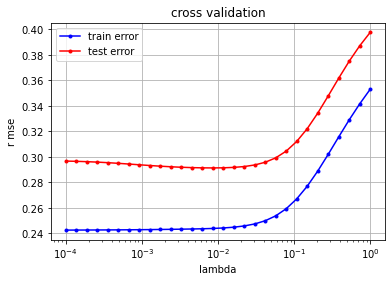

In [2]:
from cross_validation import * 
_,_, acc = cross_validation_ridge_regression(y1, x1, k_fold, lambdas, 7)
print(acc)

In [3]:
print(acc)

0.0


False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
67.7604


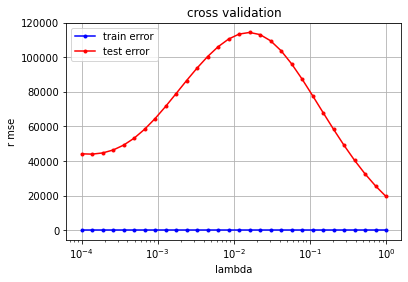

In [23]:
best_lambda,best_rmse, acc = cross_validation_ridge_regression(y, tx, k_fold, lambdas, 7)
print(acc)

In [52]:
from ridge_regression import *
w = ridge_regression(y, tx, best_lambda)
y_pred=predict_y(tx_te, w)
print(np.sum(y_pred == -np.ones(np.shape(y_pred))))
print(np.shape(y_te))
print(np.sum(y_te))
acc = compute_accuracy(y_pred, y_te)
print(acc)

556694
(250000,)
-78666.0
2.031543121016194


In [7]:
cross_validation_logistic_regression(y, tx, k_fold, initial_w, max_iters, gammas)

NameError: name 'cross_validation_logistic_regression' is not defined

In [8]:
cross_validation_reg_logistic_regression(y, tx, k_fold, initial_w, max_iters, lambdas, gammas)

NameError: name 'cross_validation_reg_logistic_regression' is not defined